In [3]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## データの読み込み

In [4]:
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
X_train, X_test = X_train.astype(np.float32), X_test.astype(np.float32)

## モデルの定義

In [5]:
model = keras.Sequential(
    layers = [
        layers.Dense(5),
        layers.Activation(keras.activations.sigmoid),
        layers.Dense(3)
        #layers.Activation(keras.activations.softmax),
    ],#3層のNN
    name="SimplyMLP"
)

In [6]:
 model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    loss_weights=True,
    metrics = "acc",
    run_eagerly = False
)

In [7]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=0)

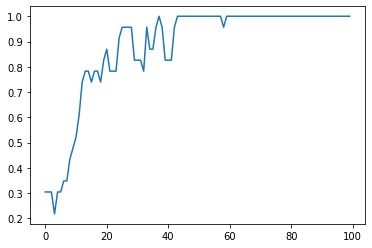

In [8]:
import pandas as pd
df =  pd.DataFrame(history.history)
plt.plot(df["val_acc"])

In [11]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 965us/step - loss: 0.2768 - acc: 0.9474


[0.2768246829509735, 0.9473684430122375]

## subclass

In [ ]:
class MyNN(keras.Model):
    def __init__(self, hidden_size=3, output_size=5, name = "mynn"):
        super().__init__(name=name)
        self.l1 = layers.Dense(hidden_size)
        self.l2 = layers.Dense(output_size)
        
        
    def call(self, x):
        y = self.l1(x)
        y = keras.activations.sigmoid(y)
        y = self.l2(y)
        return y
    
    

In [ ]:
model = MyNN(5,3)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    loss_weights=True,
    metrics = "acc",
    run_eagerly = False
)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=0)

In [ ]:
df =  pd.DataFrame(history.history)
plt.plot(df["val_acc"])

In [ ]:
class CustomNN(keras.Model):
    def __init__(self, hidden_size=3, output_size=5, name = "mynn"):
        super().__init__(name=name)
        self.l1 = layers.Dense(hidden_size)
        self.l2 = layers.Dense(output_size)
        
        
    def call(self, x):
        y = self.l1(x)
        y = keras.activations.sigmoid(y)
        y = self.l2(y)
        return y
    
    def train_step(self, minibatch):
        x, y = minibatch# x: data, y: label
        with tf.GradientTape() as tape:
            y_pred = self.call(x)# forward prop
            loss = self.compiled_loss(y, y_pred)
        #勾配の計算
        params = self.trainable_variables
        gradients = tape.gradient(loss, params)
        #勾配を使ってパラエータの更新をする
        self.optimizer.apply_gradient(zip(gradients, params))
        
        #必要であれば以下も追加
        #メトリクス
        self.compiled_metrics.update_state(y, y_pred)
        return {m.name: m.result() for m in self.metrics}
    
    def test_step(self, minibatch):
        x, y = minibatch# x: data, y: label
        
        y_pred = self.call(x)# forward prop
        loss = self.compiled_loss(y, y_pred)
        
        #必要であれば以下も追加
        #メトリクス
        self.compiled_metrics.update_state(y, y_pred)
        return {m.name: m.result() for m in self.metrics}

In [ ]:
model = CustomNN()

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    loss_weights=True,
    metrics = "acc",
    run_eagerly = False
)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=0)